## Implementation of Linear Regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms


Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\rushi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading and preproceesing data

In [2]:
train_data=pd.read_csv(r"C:\Users\rushi\Downloads\house-prices-advanced-regression-techniques\train.csv")

train_data.fillna(train_data.mean(),inplace=True)
train_data.head()

C:\Users\rushi\AppData\Local\Temp\ipykernel_11192\885013361.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.mean(),inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Train Test split in training data
selected_features_train = ['GrLivArea','BedroomAbvGr','FullBath','SalePrice']
train_data=train_data[selected_features_train]
X = train_data[['GrLivArea','BedroomAbvGr','FullBath']]
y = train_data['SalePrice']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
# Initializr the train model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
# Prediction on the validation set
y_val_pred = model.predict(X_val)

In [6]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 35788.061292436294


In [7]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2806426667.247852


In [8]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 52975.717713381215


In [9]:
# Perform Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [10]:
# Define RMSE as a scoring metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(cv_scores)
std_rmse = np.std(cv_scores)

print(f"Cross-Validation RMSE: {mean_rmse:.4f} ± {std_rmse:.4f}")

Cross-Validation RMSE: 51452.6993 ± 5671.0770


In [11]:
# Loading of the Testing data
test_data=pd.read_csv(r"C:\Users\rushi\Downloads\house-prices-advanced-regression-techniques\test.csv")
test_data.fillna(test_data.mean(),inplace=True)
test_data.head()

C:\Users\rushi\AppData\Local\Temp\ipykernel_11192\3845176717.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.fillna(test_data.mean(),inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
test_data=test_data[['GrLivArea','BedroomAbvGr','FullBath']]


In [13]:
# Prediction on test data
y_test_pred= model.predict(test_data)


In [14]:
predictions_df = pd.DataFrame({'Id':test_data.index,'Predicted_Saleprice':y_test_pred})
# Saving the Dataframe to csv file
predictions_df.to_csv(r"C:\Users\rushi\OneDrive\Desktop\6 sem\InternshipML\predictions2.csv", index=False)
# Scatter plot of Id vs Predicted SalePrice
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Id', y='Predicted_SalePrice', data=predictions_df, alpha=0.8)
plt.title('Predicted Sale Prices')
plt.xlabel('Id')
plt.ylabel('Predicted SalePrice')
plt.show()'''


"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='Id', y='Predicted_SalePrice', data=predictions_df, alpha=0.8)\nplt.title('Predicted Sale Prices')\nplt.xlabel('Id')\nplt.ylabel('Predicted SalePrice')\nplt.show()"

In [17]:
print(predictions_df.head())

   Id  Predicted_Saleprice
0   1        122173.313104
1   2        140561.538683
2   3        201783.754896
3   4        199183.097221
4   5        192133.739106


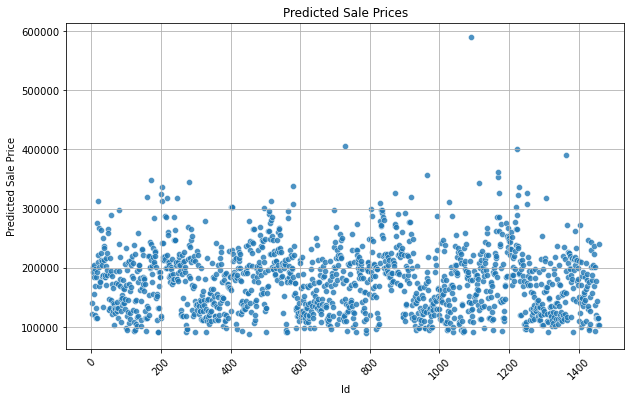

In [20]:
predictions_df = pd.read_csv(r"C:\Users\rushi\OneDrive\Desktop\6 sem\InternshipML\predictions2.csv")

# Visualize the predicted sale prices using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Id', y='Predicted_Saleprice', data=predictions_df, alpha=0.8)
plt.title('Predicted Sale Prices')
plt.xlabel('Id')
plt.ylabel('Predicted Sale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()